## Spatial analysis

In [1]:
import movekit as mkit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d, convex_hull_plot_2d, delaunay_plot_2d

In [2]:
path = "datasets/fish-5-cleaned.csv"
data = mkit.read_data(path)
data = mkit.extract_features(data)
data.head()

Extracting all absolute features: 100%|██████████| 100.0/100 [00:01<00:00, 73.58it/s]


,time,animal_id,x,y,distance,direction,turning,average_speed,average_acceleration,stopped
0,1,312,405.29,417.76,0.0,"(0.0, 0.0)",0.0,0.115306,0.005298,1
1,1,511,369.99,428.78,0.0,"(0.0, 0.0)",0.0,0.012708,0.002823,1
2,1,607,390.33,405.89,0.0,"(0.0, 0.0)",0.0,0.045118,0.003392,1
3,1,811,445.15,411.94,0.0,"(0.0, 0.0)",0.0,0.232790,0.026729,1
4,1,905,366.06,451.76,0.0,"(0.0, 0.0)",0.0,0.067000,0.001639,1


### Spatial Objects
The function below produces three types of spatial objects: Voronoi-Diagrams, Convex Hulls and Delaunay Triangles. Optionally, one may obtain only group-specific outputs - one object per time-capture. These spatial objects may be used for a set of attributes, which are described below in detail.
To get the full functionality of all attributes, please go to https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/spatial.html.

In [3]:
spatial_obj = mkit.get_spatial_objects(data, group_output = True)
spatial_obj.head()

Calculating spatial objects: 100%|██████████| 1000/1000 [00:09<00:00, 102.57it/s]


,time,convex_hull_object,voronoi_object,delaunay_object,convex_hull_volume,voronoi_volume
0,1,<scipy.spatial._qhull.ConvexHull object at 0x7...,<scipy.spatial._qhull.Voronoi object at 0x7fa9...,<scipy.spatial._qhull.Delaunay object at 0x7fa...,1519.44120,inf
1,2,<scipy.spatial._qhull.ConvexHull object at 0x7...,<scipy.spatial._qhull.Voronoi object at 0x7fa9...,<scipy.spatial._qhull.Delaunay object at 0x7fa...,1528.95525,inf
2,3,<scipy.spatial._qhull.ConvexHull object at 0x7...,<scipy.spatial._qhull.Voronoi object at 0x7fa9...,<scipy.spatial._qhull.Delaunay object at 0x7fa...,1539.23800,inf
3,4,<scipy.spatial._qhull.ConvexHull object at 0x7...,<scipy.spatial._qhull.Voronoi object at 0x7fa9...,<scipy.spatial._qhull.Delaunay object at 0x7fa...,1549.61380,inf
4,5,<scipy.spatial._qhull.ConvexHull object at 0x7...,<scipy.spatial._qhull.Voronoi object at 0x7fa9...,<scipy.spatial._qhull.Delaunay object at 0x7fa...,1560.33905,inf


#### Producing a voronoi diagram
Each timestep gets a voronoi object as well as the area of the voronoi - shape. Infinity, if respective animal is outmost in swarm.

Voronoi object contains the following attributes:

- `points` Coordinates of input points.

- `vertices` Coordinates of the Voronoi vertices.

- `ridge_points` Indices of the points between which each Voronoi ridge lies.

- `ridge_vertices` Indices of the Voronoi vertices forming each Voronoi ridge.

- `regions` Indices of the Voronoi vertices forming each Voronoi region. -1 indicates vertex outside the Voronoi diagram.

- `point_region` Index of the Voronoi region for each input point. If qhull option “Qc” was not specified, the list will contain -1 for points that are not associated with a Voronoi region.

- `furthest_site` True if this was a furthest site triangulation and False if not.



#### Producing a convex hull
Similar to voronoi-diagram, also the convex hull is of interest for movement-related data. Additionally, a set of attributes may be attached to the convex hull objects. Examples are:

- `points` (array of ints) Coordinates of input points

- `vertices` (array of ints ) Point indices forming the veritces of the convex hull

- `area` Area of the convex hull.

- `volume` Volume of the convex hull.

#### Producing Delaunay-triangles
Examples for attributes of interest consist of:

- `transform`	Affine transform from x to the barycentric coordinates c.
- `vertex_to_simplex`	Lookup array, from a vertex, to some simplex which it is a part of.
- `convex_hull`	Vertices of facets forming the convex hull of the point set.
- `vertex_neighbor_vertices`	Neighboring vertices of vertices.
- `points`	(ndarray of double, shape (npoints, ndim)) Coordinates of input points.
- `simplices`	(ndarray of ints, shape (nsimplex, ndim+1)) Indices of the points forming the simplices in the triangulation. For 2-D, the points are oriented counterclockwise.
- `neighbors`	(ndarray of ints, shape (nsimplex, ndim+1)) Indices of neighbor simplices for each simplex. The kth neighbor is opposite to the kth vertex. For simplices at the boundary, -1 denotes no neighbor. 

#### Plotting all spatial objects at the 3rd timestep. 

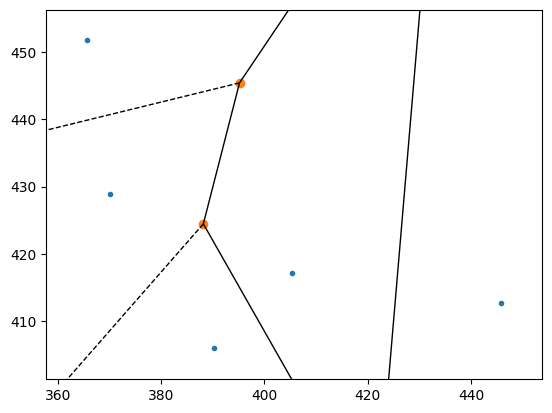

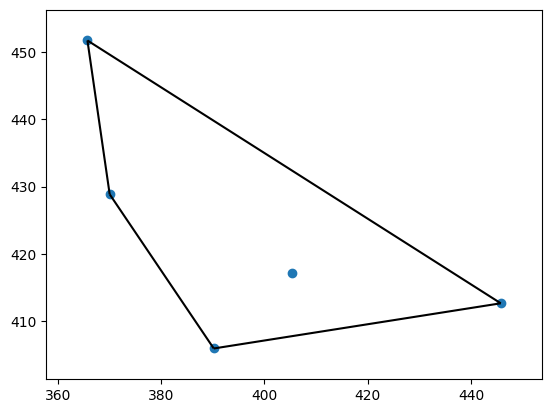

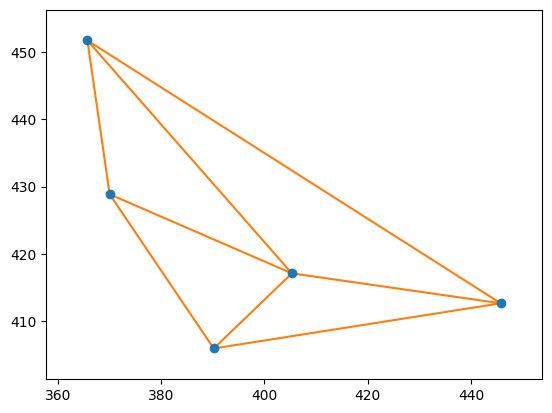

In [4]:
# Plot all scipy - spatial objects of a given timestamp
voronoi_plot_2d(spatial_obj.voronoi_object[2])
convex_hull_plot_2d(spatial_obj.convex_hull_object[2])
delaunay_plot_2d(spatial_obj.delaunay_object[2])
plt.show()